In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.arange(-6.28, 6.28, 0.01).reshape((-1, 1))
y_train = np.cos(X_train).reshape((-1, 1))
# y_train = (0.1 * X_train).reshape((-1, 1))

X_test = np.arange(-4*np.pi, 4*np.pi, 0.01).reshape((-1, 1))
y_test = np.cos(X_test).reshape((-1, 1))
# y_test = (0.1 * X_test).reshape((-1,1))

N = X_train.shape[0]

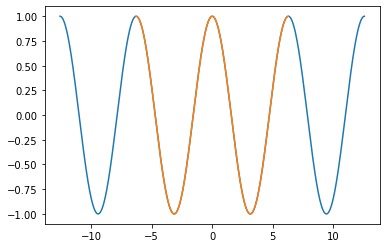

In [3]:
plt.plot(X_test, y_test)
plt.plot(X_train, y_train)


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1256, 1), (1256, 1), (2514, 1), (2514, 1))

In [16]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [35]:
def GD(weights, grads, learning_rate):
    for w, g in zip(weights, grads):
        w -= learning_rate * g

def l2_regularization(W, reg_strength):
    loss = reg_strength * np.sum(W ** 2)
    grad = 2 * reg_strength * W
    return loss, grad

class Adam():
    def __init__(self, parameters_shapes, beta_1=0.9, beta_2=0.999, epsilon = 1e-8):
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.param_shapes = parameters_shapes
        
        self.t = 1
        self.v = [np.zeros(s) for s in parameters_shapes]
        self.s = [np.zeros(s) for s in parameters_shapes]
        
        
    def update(self, weights, grads, learning_rate):
        
        for i, (grad, w) in enumerate(zip(grads, weights)):
            self.v[i] = self.beta_1 * self.v[i] + (1 - self.beta_1) * grad
            self.s[i] = self.beta_2 * self.s[i] + (1 - self.beta_2) * np.square(grad)
            
            v_bias_corr = self.v[i] / (1 - self.beta_1 ** self.t)
            s_bias_corr = self.s[i] / (1 - self.beta_2 ** self.t)
            w -= learning_rate * v_bias_corr / (np.sqrt(s_bias_corr)+ self.epsilon)
        self.t+=1
        


class Perceptron():
    def __init__(self, params=None):
        if params is None:
            self.w1 = 0.1 * np.random.randn(1, 30)
            self.w2 = 0.1 * np.random.randn(30, 30)
            self.w3 = 0.1 * np.random.randn(30, 10)
            self.w4 = 0.1 * np.random.randn(10, 1)   
        else:
            self.w1 = params[0]
            self.w2 = params[1]
            self.w3 = params[2]
            self.w4 = params[3] 
            
       
            
    def forward(self, X):
        self.x0 = X
        self.z1 = np.dot(self.x0, self.w1)
        self.x1 = sigmoid(self.z1)
        self.z2 = np.dot(self.x1, self.w2)
        self.x2 = sigmoid(self.z2)
        self.z3 = np.dot(self.x2, self.w3)
        self.x3 = sigmoid(self.z3)
        self.z4 = np.dot(self.x3, self.w4)
        y_pred = self.z4
        return y_pred
    
    def backward(self, y_pred, y_train):
        delta_4 = (y_pred - y_train)
        dEdW4 = np.dot(self.x3.T, delta_4)

        delta_3 = np.dot(delta_4, self.w4.T) * sigmoid_derivative(self.z3)
        dEdW3 = np.dot(self.x2.T, delta_3)

        delta_2 = np.dot(delta_3, self.w3.T) * sigmoid_derivative(self.z2)
        dEdW2 = np.dot(self.x1.T, delta_2)

        delta_1 = np.dot(delta_2, self.w2.T) * sigmoid_derivative(self.z1)
        dEdW1 = np.dot(self.x0.T, delta_1)
        
        return [dEdW1, dEdW2, dEdW3, dEdW4]
    
    def update(self, grads, learning_rate):
        self.optimizer([self.w1, self.w2, self.w3, self.w4],  grads, learning_rate)


    def fit(self, X_train, y_train, learning_rate, num_epochs=50, optimizer=GD):
        best_params = 0
        best_loss = 10**9
        self.optimizer = optimizer
        
        loss_history = []
        for epoch in range(num_epochs):
            y_pred = self.forward(X_train)
            loss = np.sum(y_pred-y_train)**2
            
            if loss<best_loss:
                best_loss = loss
                best_params = [self.w1, self.w2, self.w3, self.w4]
            
            if epoch % 100 == 0:
                print(epoch, 'Loss: ', loss)
                pass            
            
            grads = self.backward(y_pred, y_train)
            
            for i, w in enumerate([self.w1, self.w2, self.w3, self.w4]):
                loss_l2, grad_l2 = l2_regularization(w, 0.001)
                loss += loss_l2
                grads[i] += grad_l2
                
            loss_history.append(loss)
            
            self.update(grads, learning_rate)
        
        return loss_history, best_params
            

In [42]:
model = Perceptron()
loss, best_model_params = model.fit(X_train, y_train, 1e-3 , 2500, optimizer=Adam([(1, 30), (30, 30), (30, 10), (10, 1)]).update)

0 Loss:  3521.4830771920792
100 Loss:  0.057830266249706136
200 Loss:  0.002645117489204879
300 Loss:  0.023021470122320226
400 Loss:  0.12905669404900064
500 Loss:  5.531462248602787
600 Loss:  27.117819243913743
700 Loss:  1133.8299750115214
800 Loss:  28.8477789564411
900 Loss:  3.459079785620626
1000 Loss:  1.0930985874443149
1100 Loss:  0.5616417893578528
1200 Loss:  0.0997595002996293
1300 Loss:  0.1370096338451959
1400 Loss:  1.5194886778496974
1500 Loss:  0.04108941881231968
1600 Loss:  0.039115976007639754
1700 Loss:  0.02485324457826677
1800 Loss:  0.020035287740905645
1900 Loss:  4.687358210601859
2000 Loss:  0.015241610051169708
2100 Loss:  0.008676714692813605
2200 Loss:  1.6915545612208651
2300 Loss:  0.0033528407601174444
2400 Loss:  0.0043607210033243795


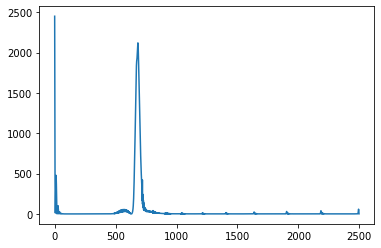

In [43]:
plt.plot(loss[1:])

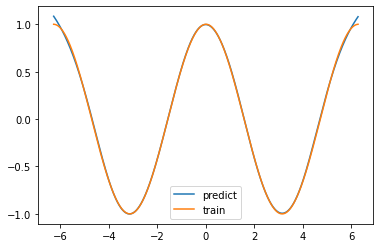

In [44]:
model_best = Perceptron(best_model_params)
plt.plot(X_train, model.forward(X_train), label='predict')
# plt.plot(X_train, model_best.forward(X_train))
plt.plot(X_train, y_train, label='train')
plt.legend()

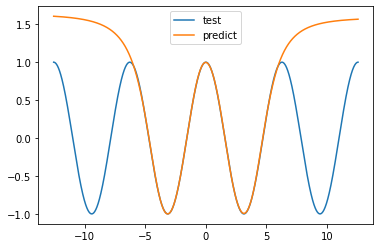

In [45]:
plt.plot(X_test, y_test, label='test')
plt.plot(X_test, model.forward(X_test), label='predict')
plt.legend()

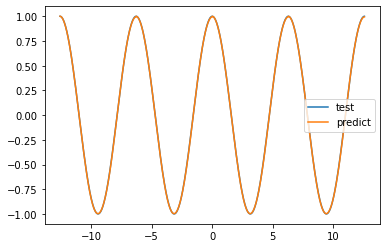

In [46]:
plt.plot(X_test, y_test, label='test')
plt.plot(X_test, -model.forward(X_test % (2*np.pi)-np.pi), label='predict')
plt.legend()

In [47]:
np.sum((-model.forward(X_test % (2*np.pi)-np.pi) - y_test)**2)/len(X_test)

1.5056685872888841e-05